# EDA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
df = pd.read_parquet("/content/drive/MyDrive/datasets/reddit_parser_2024_10_processed.parquet")
df.head()

,id,title,url,subreddit,created_utc,parsed_utc,text,score,num_comments,type,parent_id,processed_text,processed_text_length,sentiment_scores,entities,doc_embedding
0,1gc59dz,Killam Apartment REIT (KMP-UN.TO) residential ...,https://www.reddit.com/r/ValueInvesting/commen...,valueinvesting,2024-10-25 21:28:56,2024-10-26 01:00:01,"Hey all, \n\nHoping someone may have some insi...",2,1.0,submission,None,hey all hope insight residenti reit trade book...,1666,0.8929,"[REIT, NOI]","[0.4954421, -0.85142803, -1.1998187, -0.144596..."
1,ltreavu,None,None,valueinvesting,2024-10-25 22:41:00,2024-10-26 01:00:01,REITs often trade below book value during peri...,1,NaN,comment,1gc59dz,reit trade book valu period high rate unusu al...,1034,0.9892,"[FFO, Halifax, NOI]","[0.646285, 0.98801804, -0.9565413, -0.74188703..."
2,1gc4xe1,Methode Electronics (MEI) - Great Long Term Va...,https://www.reddit.com/r/ValueInvesting/commen...,valueinvesting,2024-10-25 21:13:44,2024-10-26 01:00:01,Hi guys - so I figured I'd post another intere...,1,2.0,submission,None,hi guy i figur i post interest i think sell wa...,2324,0.9963,[Stonebridge],"[-0.4709236, 0.8926423, -0.39287212, -0.630740..."
3,ltr96s4,None,None,valueinvesting,2024-10-25 22:10:06,2024-10-26 01:00:01,This is a 2x if you look past the noise here. ...,2,NaN,comment,1gc4xe1,thi look past nois here method mistak market p...,553,-0.1779,[CFO],"[0.23834999, 0.25356498, 0.25720757, -0.647911..."
4,ltrgv9n,None,None,valueinvesting,2024-10-25 22:56:39,2024-10-26 01:00:01,This is a solid deep value play. The 0.42 P/B ...,1,NaN,comment,1gc4xe1,thi solid deep valu play the p b ratio jump im...,1002,0.9685,[Stonebridge],"[-0.35578033, 1.2225814, -1.0916336, 0.5399548..."


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56831 entries, 0 to 1146
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     56831 non-null  object 
 1   title                  3568 non-null   object 
 2   url                    3568 non-null   object 
 3   subreddit              56831 non-null  object 
 4   created_utc            56831 non-null  object 
 5   parsed_utc             56831 non-null  object 
 6   text                   56831 non-null  object 
 7   score                  56831 non-null  int64  
 8   num_comments           3568 non-null   float64
 9   type                   56831 non-null  object 
 10  parent_id              53263 non-null  object 
 11  processed_text         56831 non-null  object 
 12  processed_text_length  56831 non-null  int64  
 13  sentiment_scores       56831 non-null  float64
 14  entities               56831 non-null  object 
 15  doc_embe

In [ ]:
!pip install skimpy

In [24]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 56831  │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 14     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA     ┃ NA %   ┃ mean  ┃ sd     ┃ p0      ┃ p25 ┃ p50   ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ score                 │      0 │      0 │ 10.86 │  64.41 │     -58 │   1 │     1 │      4 │  3836 │   ▇    │  │
│ │ num_comments          │  53263 │  93.72 │ 41.56 │  88.53 │       0 │   4 │    13 │     41 │  2165 │   ▇    │  │
│ │ processed_text_length │      0 │      0 │ 292.1 │  671.1 │       1 │  54 │   131 │    315 │ 39330 │   ▇    │  │
│ │ sentiment_scores      │      0 │      0 │ 0.209 │ 0.4887 │ -0.9981 │   0 │ 0.128 │ 0.6369 │     1 │ ▁▂▇▂▅▆ │  │
│ └───────────────────────┴────────┴────────┴───────┴────────┴─────────┴─────┴───────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA          ┃ NA %        ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ id                          │           0 │           0 │                         1 │                56831 │  │
│ │ title                       │       53263 │       93.72 │                      0.58 │                32738 │  │
│ │ url                         │       53263 │       93.72 │                     0.063 │                 3568 │  │
│ │ subreddit                   │           0 │           0 │                         1 │                56831 │  │
│ │ created_utc                 │           0 │           0 │                         2 │               113662 │  │
│ │ parsed_utc                  │           0 │           0 │                         2 │               113662 │  │
│ │ text                        │           0 │           0 │                        51 │              2878477 │  │
│ │ type                        │           0 │           0 │                         1 │                56831 │  │
│ │ parent_id                   │        3568 │        6.28 │                      0.94 │                53263 │  │
│ │ processed_text              │           0 │           0 │                        28 │              1563544 │  │
│ └─────────────────────────────┴─────────────┴─────────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Text preprocessing

### Remove rows with irrelevant content

In [6]:
df = df[~df['text'].isin(['','[]', '[deleted]', '['])]
df.shape

(57060, 11)

### Examine duplicate posts/comments

In [7]:
print(f"Number of duplicate post/comments {df.duplicated(['title', 'text']).sum()}")
df[df.duplicated(['title', 'text'], keep=False)].sort_values('title').head(10)

Number of duplicate post/comments 1391


,id,title,url,subreddit,created_utc,parsed_utc,text,score,num_comments,type,parent_id
1266,1gddbuv,Cheaper to buy long call or protective put,https://www.reddit.com/r/stocks/comments/1gddb...,stocks,2024-10-27 15:20:18,2024-10-30 22:12:40,Suppose I like a stock with current price of $...,12,15.0,submission,None
758,1gddbkv,Cheaper to buy long call or protective put,https://www.reddit.com/r/options/comments/1gdd...,options,2024-10-27 15:19:58,2024-10-30 22:39:38,Suppose I like a stock with current price of $...,8,25.0,submission,None
68,1gfq29w,Fixed Income and Maturity EU Corporate Bonds (...,https://www.reddit.com/r/investing/comments/1g...,investing,2024-10-30 16:02:05,2024-10-30 22:05:50,"Hello Gentlemens and Ladies,\n\nI want to inve...",1,3.0,submission,None
164,1gfq2s3,Fixed Income and Maturity EU Corporate Bonds (...,https://www.reddit.com/r/stocks/comments/1gfq2...,stocks,2024-10-30 16:02:41,2024-10-30 22:12:05,"Hello Gentlemens and Ladies,\n\nI want to inve...",2,1.0,submission,None
6072,1g2lmae,For those wondering if we're in a bull market....,https://www.reddit.com/r/investing/comments/1g...,investing,2024-10-13 09:06:39,2024-10-30 22:08:51,"COST, a high volume retail store, trades at 50...",0,25.0,submission,None
6742,1g2m1hx,For those wondering if we're in a bull market....,https://www.reddit.com/r/stocks/comments/1g2m1...,stocks,2024-10-13 09:39:43,2024-10-30 22:14:49,"COST, a high volume retail store, trades at 50...",0,54.0,submission,None
455,1gf4bqo,How do you choose between trading spot or futu...,https://www.reddit.com/r/Daytrading/comments/1...,daytrading,2024-10-29 20:16:34,2024-10-30 22:30:51,What’s the difference between spot and futures...,1,2.0,submission,None
1230,1ge07iu,How do you choose between trading spot or futu...,https://www.reddit.com/r/Daytrading/comments/1...,daytrading,2024-10-28 11:58:54,2024-10-30 22:31:47,What’s the difference between spot and futures...,1,1.0,submission,None
1740,1gcvh6t,The absolute madness of Tesla,https://www.reddit.com/r/investing/comments/1g...,investing,2024-10-26 21:33:02,2024-10-30 22:06:33,![img](51seuul3t5xd1)\n\nJust the sheer madnes...,0,20.0,submission,None
1431,1gcvgji,The absolute madness of Tesla,https://www.reddit.com/r/stocks/comments/1gcvg...,stocks,2024-10-26 21:32:10,2024-10-30 22:12:44,![img](51seuul3t5xd1)\n\nJust the sheer madnes...,606,248.0,submission,None


In [8]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

nltk.download('stopwords')

ENGLISH_STOP_WORDS = set( stopwords.words('english') ).union(set(ENGLISH_STOP_WORDS))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### We need to keep original texts for sentiment analysis ("The movie was not good at all" vs "movie good")

In [11]:
df['clean_text'] = df['text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in ENGLISH_STOP_WORDS]))

In [12]:
df[['text', 'clean_text']]

,text,clean_text
0,"Hey all, \n\nHoping someone may have some insi...","hey all, hoping insight residential reit trade..."
1,REITs often trade below book value during peri...,reits trade book value periods high rates - un...
2,Hi guys - so I figured I'd post another intere...,hi guys - i figured i'd post interesting i thi...
3,This is a 2x if you look past the noise here. ...,this 2x look past noise here. methode mistakes...
4,This is a solid deep value play. The 0.42 P/B ...,this solid deep value play. the 0.42 p/b ratio...
...,...,...
1142,Isnt max loss if the stock goes to zero? and i...,isnt max loss stock goes zero? break stock get...
1143,"For vertical spreads:\n\nFor a credit spread, ...","for vertical spreads: for credit spread, risk ..."
1144,Why do you think a call credit spread max loss...,why think credit spread max loss stock goes down?
1145,No.\n\nUse a site like [optionstrat.com]( or s...,no. use site like [optionstrat.com]( similar w...


### Tokenization, lemmatization, stemming

In [15]:
import spacy

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")

In [14]:
def process_text(text):
    doc = nlp(text)

    processed_words = []
    for token in doc:
        if token.is_alpha:
            lemma = token.lemma_
            stem = stemmer.stem(lemma)
            processed_words.append(stem)

    return " ".join(processed_words)

In [15]:
df['processed_text'] = df['clean_text'].apply(process_text)

#### Tokenization -> Lemmatization -> Stemming produced some empty strings which need to be taken care of

In [46]:
df = df[~df['processed_text'].isin([''])]
df.shape

(56831, 14)

In [47]:
df[['text', 'clean_text', 'processed_text']].head()

,text,clean_text,processed_text
0,"Hey all, \n\nHoping someone may have some insi...","hey all, hoping insight residential reit trade...",hey all hope insight residenti reit trade book...
1,REITs often trade below book value during peri...,reits trade book value periods high rates - un...,reit trade book valu period high rate unusu al...
2,Hi guys - so I figured I'd post another intere...,hi guys - i figured i'd post interesting i thi...,hi guy i figur i post interest i think sell wa...
3,This is a 2x if you look past the noise here. ...,this 2x look past noise here. methode mistakes...,thi look past nois here method mistak market p...
4,This is a solid deep value play. The 0.42 P/B ...,this solid deep value play. the 0.42 p/b ratio...,thi solid deep valu play the p b ratio jump im...


# Statistical analysis

In [ ]:
import spacy

from collections import Counter
from nltk import ngrams, sent_tokenize
from wordcloud import WordCloud

nltk.download('punkt')

In [ ]:
all_text = df['processed_text'].str.cat(sep=' ').lower()
all_words = all_text.split()

Mean text length: 292.07803839453817
Min text length: 1
Max text length: 39332


<Axes: >

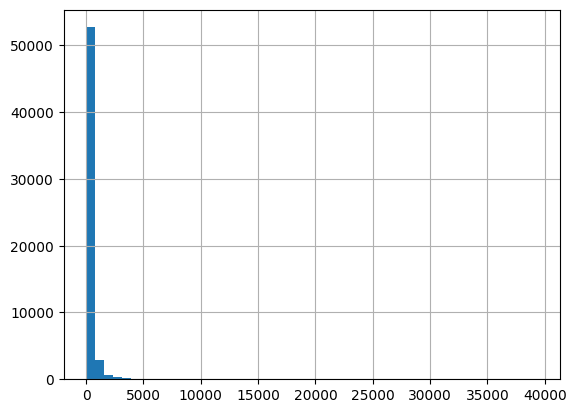

In [55]:
df['processed_text_length'] = df['text'].apply(lambda x: len(x))

print(f"Mean text length: {df['processed_text_length'].mean()}")
print(f"Min text length: {df['processed_text_length'].min()}")
print(f"Max text length: {df['processed_text_length'].max()}")

df['processed_text_length'].hist(bins=50)

<Axes: >

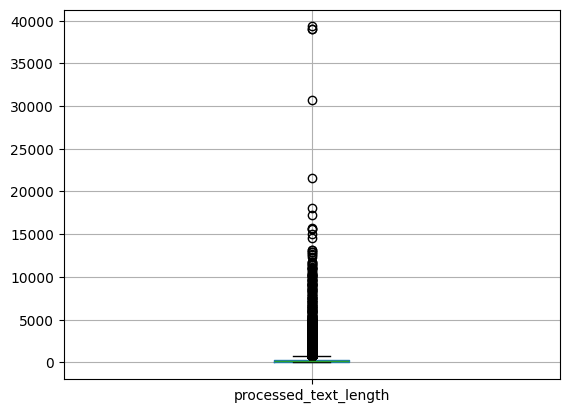

In [52]:
df.boxplot(column='processed_text_length')

In [53]:
char_counts = Counter(all_text)
print("Character frequency analysis:")
for char, count in char_counts.most_common(10):
    print(f"'{char}': {count}")

Character frequency analysis:
' ': 1563543
'e': 771677
'i': 623443
't': 619779
'a': 583530
'o': 547330
'r': 534238
'n': 444224
's': 389092
'l': 380075


In [56]:
num_words = len(all_words)
avg_word_length = sum(len(all_words) for all_words in all_words) / num_words
print(f"\nОбщее количество слов: {num_words}")
print(f"Средняя длина слова: {avg_word_length:.2f}")


Общее количество слов: 1563544
Средняя длина слова: 4.71


In [28]:
word_counts = Counter(all_words)

print("Most common words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Most common words:
i: 58275
stock: 15884
it: 15216
market: 12974
year: 12943
like: 12383
invest: 12086
compani: 11472
trade: 10563
the: 10512


In [29]:
bigrams = list(ngrams(all_words, 2))

bigram_counts = Counter(bigrams)

print("Most common bigrams:")
for bigram, count in bigram_counts.most_common(10):
    print(f"{bigram}: {count}")

Most common bigrams:
('i', 'think'): 3740
('long', 'term'): 2313
('i', 'buy'): 1549
('i', 'do'): 1545
('i', 'know'): 1331
('i', 'like'): 1177
('i', 'want'): 1125
('i', 'use'): 1027
('stock', 'market'): 966
('year', 'i'): 948


In [30]:
trigrams = list(ngrams(all_words, 3))

trigram_counts = Counter(trigrams)

print("Most common trigrams:")
for trigram, count in trigram_counts.most_common(10):
    print(f"{trigram}: {count}")

Most common trigrams:
('click', 'here', 'for'): 599
('r', 'stock', 'all'): 296
('i', 'think', 'i'): 278
('i', 'feel', 'like'): 265
('free', 'cash', 'flow'): 232
('i', 'do', 'think'): 209
('i', 'do', 'not'): 182
('i', 'know', 'i'): 177
('i', 'do', 'know'): 168
('long', 'term', 'invest'): 164


#### Sentences should be counted for pre-stemmed text

In [35]:
unprocessed_text = df['clean_text'].str.cat(sep=' ').lower()


sentences = sent_tokenize(unprocessed_text, language='english')
num_sentences = len(sentences)
avg_sentence_length = num_words / num_sentences
print(f"\nTotal number of sentences: {num_sentences}")
print(f"Average sentence length (words): {avg_sentence_length:.2f}")


Total number of sentences: 172645
Average sentence length (words): 9.06


In [32]:
pos_counts = Counter()
for doc in nlp.pipe(df['processed_text'].tolist()):
    pos_counts.update([token.pos_ for token in doc])

print("\nРаспределение частей речи:")
for pos, count in pos_counts.items():
    print(f"{pos}: {count}")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



Распределение частей речи:
INTJ: 10318
PRON: 108704
VERB: 252890
PROPN: 298243
NOUN: 570443
ADJ: 156695
X: 3828
ADV: 45929
SCONJ: 18770
DET: 18774
CCONJ: 8342
ADP: 32943
NUM: 7110
AUX: 24846
PART: 5361
PUNCT: 220
SYM: 149


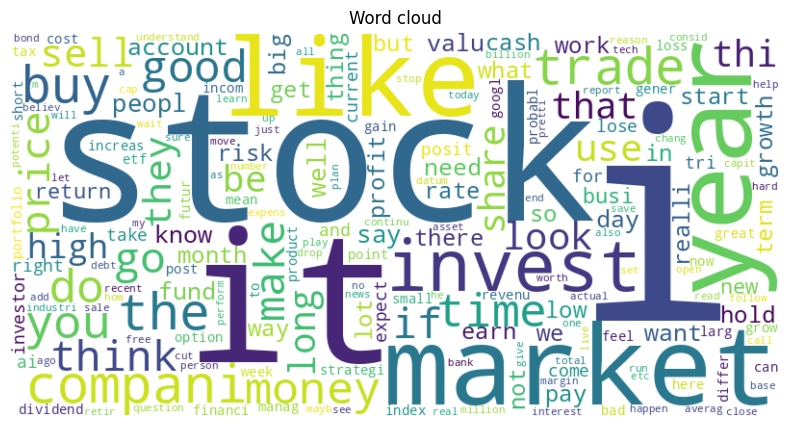

In [33]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word cloud")
plt.show()

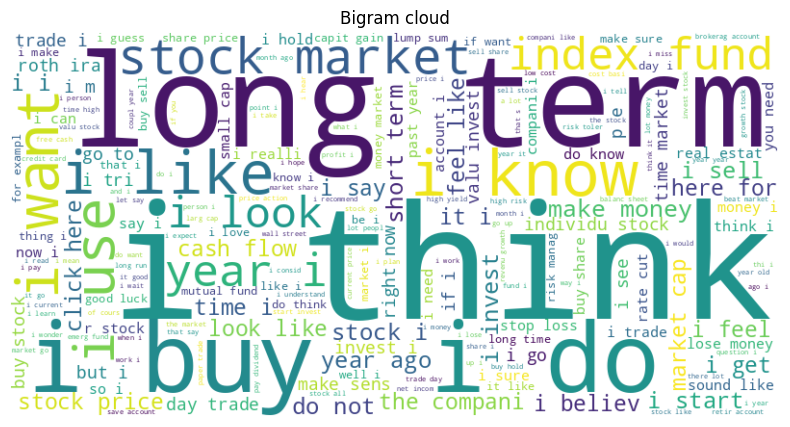

In [34]:
bigram_dict = {" ".join(bigram): count for bigram, count in bigram_counts.items()}

bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict)

plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Bigram cloud")
plt.show()

# Sentiment analysis
#### Should be applied to default texts

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

In [4]:
sia = SentimentIntensityAnalyzer()

df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x).get('compound'))

In [5]:
pd.set_option('display.max_colwidth', None)

df[['text', 'sentiment_scores']].head(5)

,text,sentiment_scores
0,"Hey all, \n\nHoping someone may have some insight as to why this residential reit trades below book value with decreasing share price even with an environment I would think tends to favor residential real estate. Lowering of interest rates in Canada mixed with my worry of inflation forecast leaned me towards residential REIT. \n\nThey are in expansion mode quickly building/buying new condominium, revenue is up every year, property NOI growth exceeds 8%, the bulk of their portfolio lies in a favorable area for real estate, debt is under control, etc. Every metric leads me to believe this company is doing well & will continue to do so. \n\nSo why would the share price not reflect that, I'm no smarter than the next guy although I work directly with stocks (though within the consumer sector) I do not have any insight on REIT's and my real estate knowledge is extremely limited. \n\nThey also dominate in one of Canada's fastest growing cities in term of sheer presence & occupancy. \n\nI have yet to do a deep dive on an exact share price but obviously trading below book value when everything seems good is highly unusual to me. I'd expect a company trading that low to have something terribly wrong or stronger headwinds within its business.\n\n\n\nHere is their latest investor presentation. If anyone with a deeper understanding of REIT/overall restate within Atlantic Canada (note: geographical risk greatly reduced) \n\n# [https://killamreit.com/sites/default/files/2024-09/KMP%20Investor%20Presentation%20-%20Sept%202024\_0.pdf](https://killamreit.com/sites/default/files/2024-09/KMP%20Investor%20Presentation%20-%20Sept%202024_0.pdf)\n\n \nGreatly appreciate all help!",0.8929
1,"REITs often trade below book value during periods of high interest rates - it's not unusual at all. The market prices in the higher cost of capital since REITs rely heavily on debt financing for acquisitions and development. Their existing properties also get hit with higher financing costs when they need to refinance.\n\nThe Atlantic Canada focus is actually a positive right now given the population growth in places like Halifax, but the market is more focused on the interest rate environment. Once rates start coming down meaningfully, REIT valuations should improve across the board.\n\nThe fundamentals look solid - good occupancy rates, strong NOI growth, and they're positioned well in growing markets. But until the rate environment changes, REITs will face these headwinds regardless of individual performance.\n\nKeep in mind book value for REITs can be tricky since property valuations don't always reflect true market value in either direction. Focus more on FFO multiples and distribution coverage ratios for REIT analysis.",0.9892
2,"Hi guys - so I figured I'd post another interesting one which I think is selling way below value and which the market mispriced. The company's revenue primarily comes from its automotive segment, where it supplies a range of products to automotive manufacturers. This segment includes electronic and electromechanical devices like lighting systems, sensors, and power distribution systems. It also has an industrial segment that produces lighting solutions and power distribution components, an interface segment that focuses on user interface products such as touch screens, and a medical segment aimed at producing devices for health-related applications. The reason I really like the company at this price is provided below:\n\n* Trading at 0.42 price to book value.\n* Has been profitable 45 out of last 52 quarters and has generated around 100 million dollars a year during last few years (excluding recent drop during last 4 quarters). Current market cap (of \~325 million) would put it at 3 P/E should you exclude last 4 quarters. \n* Revenue growth over last 10-15 years has been strong (has gone from 400 million in revenue 10 years ago to generating 1.2 billion). Recently the revenue has been dropping but over the 

In [6]:
pd.reset_option('display.max_colwidth')

# Correlation matrix

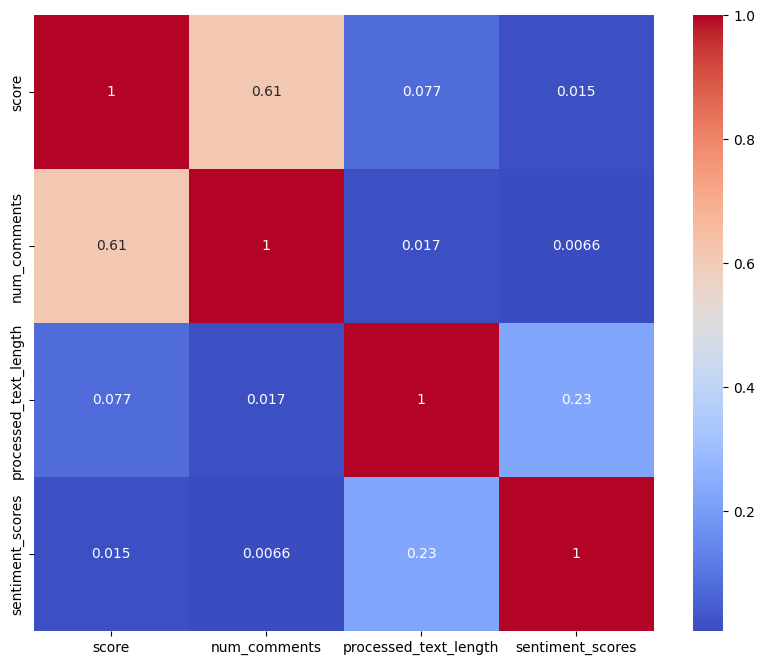

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Named Entity Recognition

In [22]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [45]:
def get_entities(text):
    doc = nlp(text)

    entities = []
    for ent in doc.ents:
      if ent.label_ == 'ORG':
        entities.append(ent.text)

    return list(set(entities))

get_entities(text)

['Dow Jones Index', 'NVDA', 'Tesla', 'Apple']

In [48]:
df['entities'] = df['text'].apply(get_entities)

In [52]:
df[['text', 'entities']].head(10)

,text,entities
0,"Hey all, \n\nHoping someone may have some insi...","[REIT, NOI]"
1,REITs often trade below book value during peri...,"[FFO, Halifax, NOI]"
2,Hi guys - so I figured I'd post another intere...,[Stonebridge]
3,This is a 2x if you look past the noise here. ...,[CFO]
4,This is a solid deep value play. The 0.42 P/B ...,[Stonebridge]
5,"Hey everyone,\n\nI’m fairly new to investing a...","[SPY, VOO, EFT]"
6,$VOO and about $2 million would be fine,[]
7,EFT = electronic funds transfer. ETF = exchang...,[EFT]
8,r/Bogleheads,[]
9,A simple suggestion is an S&P index fund like ...,"[QQQ, Invesco, Vanguard Megacaps Growth, VOO, ..."


# TF-IDF

Уменьшаем датасет, т.к. снижение размерности после TF-IDF считается слишком долго

In [4]:
small_df = df.head(5000)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
tfidf_matrix = vectorizer.fit_transform(small_df['processed_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [6]:
tfidf_df.head()

,aa,aaa,aaon,aap,aapl,ab,abat,abaxx,abb,abbot,...,zoox,zsp,zt,zto,ztstf,zuckerberg,zweig,zyn,ìf,ønsker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
mean_tfidf_scores = tfidf_df.mean()
threshold = 0.01

high_frequency_terms = mean_tfidf_scores[mean_tfidf_scores >= threshold].index.tolist()
low_frequency_terms = mean_tfidf_scores[mean_tfidf_scores < threshold].index.tolist()

print("High-frequency terms based on TF-IDF:")
print(high_frequency_terms)

High-frequency terms based on TF-IDF:
['buy', 'cash', 'compani', 'good', 'growth', 'high', 'invest', 'like', 'long', 'look', 'make', 'market', 'money', 'price', 'share', 'stock', 'think', 'time', 'use', 'valu', 'year']


# t-SNE

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=69, perplexity=5, n_iter=1000)

tsne_results = tsne.fit_transform(tfidf_df)

tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


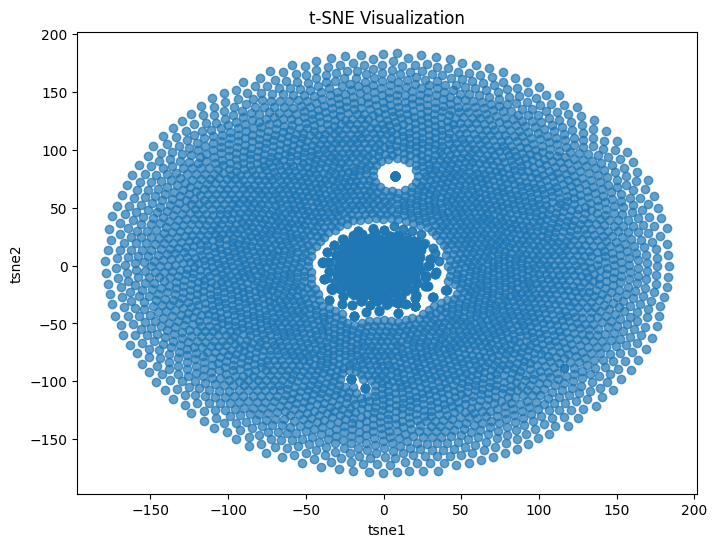

In [12]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.show()

## Reduce dimensionality using PCA, then use t-SNE

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

tsne = TSNE(n_components=2, perplexity=5, random_state=69, n_iter=1000)
tsne_results = tsne.fit_transform(reduced_data)
tsne_df_reduced = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


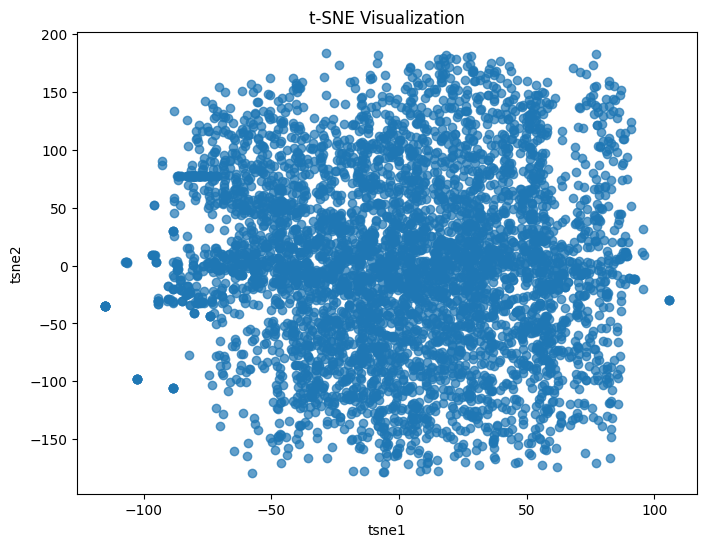

In [14]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_df_reduced['tsne1'], tsne_df['tsne2'], alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.show()

# Doc2Vec embeddings

In [15]:
!pip install gensim

In [16]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [17]:
tagged_data = [TaggedDocument(words=text.split(), tags=[doc_id]) for text, doc_id in zip(df['processed_text'], df['id'])]

In [18]:
model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=40)

model.build_vocab(tagged_data)

model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [19]:
df['doc_embedding'] = df['id'].map(lambda x: model.dv[str(x)])
df[['processed_text', 'doc_embedding']].head()

,processed_text,doc_embedding
0,hey all hope insight residenti reit trade book...,"[0.4954421, -0.85142803, -1.1998187, -0.144596..."
1,reit trade book valu period high rate unusu al...,"[0.646285, 0.98801804, -0.9565413, -0.74188703..."
2,hi guy i figur i post interest i think sell wa...,"[-0.4709236, 0.8926423, -0.39287212, -0.630740..."
3,thi look past nois here method mistak market p...,"[0.23834999, 0.25356498, 0.25720757, -0.647911..."
4,thi solid deep valu play the p b ratio jump im...,"[-0.35578033, 1.2225814, -1.0916336, 0.5399548..."


# Save updated dataset

In [ ]:
df.to_parquet('/content/drive/MyDrive/datasets/reddit_parser_2024_10_processed.parquet')